In [1]:
!pip install seaborn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
#seaborn設定
sns.set()
#背景変更
sns.set_style("darkgrid", {'grid.linestyle': '--'})
#大きさ(スケール変更)
sns.set_context("paper")

In [4]:
n=100

def true_func(x):
    z = 1-48*x+218*x**2-315*x**3+145*x**4
    return z 

def linear_func(x):
    z = x
    return z 

No handles with labels found to put in legend.


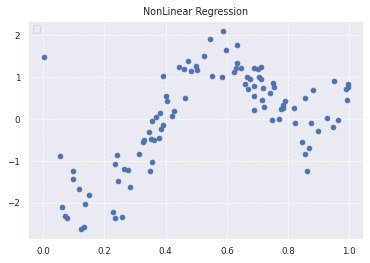

In [5]:
# 真の関数からノイズを伴うデータを生成

# 真の関数からデータ生成
data = np.random.rand(n).astype(np.float32)
data = np.sort(data)
target = true_func(data)

# 　ノイズを加える
noise = 0.5 * np.random.randn(n) 
target = target  + noise

# ノイズ付きデータを描画

plt.scatter(data, target)

plt.title('NonLinear Regression')
plt.legend(loc=2)

0.31512762971166797


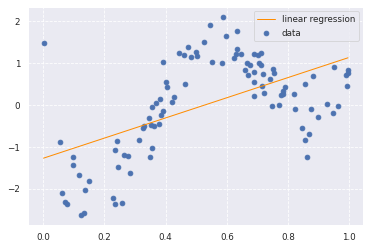

In [6]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
data = data.reshape(-1,1)
target = target.reshape(-1,1)
clf.fit(data, target)

p_lin = clf.predict(data)

plt.scatter(data, target, label='data')
plt.plot(data, p_lin, color='darkorange', marker='', linestyle='-', linewidth=1, markersize=6, label='linear regression')
plt.legend()
print(clf.score(data, target))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


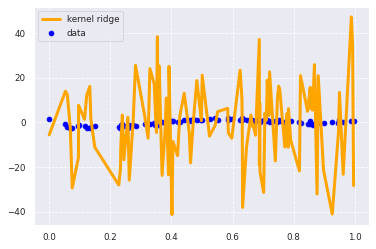

In [21]:
from sklearn.kernel_ridge import KernelRidge

clf = KernelRidge(alpha=0.0000002, kernel='rbf')
clf.fit(data, target)

p_kridge = clf.predict(data)

plt.scatter(data, target, color='blue', label='data')

plt.plot(data, p_kridge, color='orange', linestyle='-', linewidth=3, markersize=6, label='kernel ridge')
plt.legend()
#plt.plot(data, p, color='orange', marker='o', linestyle='-', linewidth=1, markersize=6)

0.7985882368924782


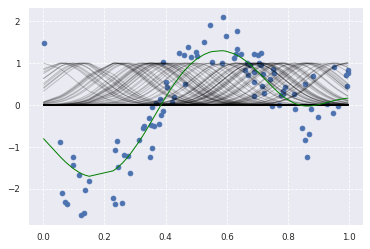

In [8]:
#Ridge

from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Ridge

kx = rbf_kernel(X=data, Y=data, gamma=50)
#KX = rbf_kernel(X, x)

#clf = LinearRegression()
clf = Ridge(alpha=30)
clf.fit(kx, target)

p_ridge = clf.predict(kx)

plt.scatter(data, target,label='data')
for i in range(len(kx)):
    plt.plot(data, kx[i], color='black', linestyle='-', linewidth=1, markersize=3, label='rbf', alpha=0.2)

#plt.plot(data, p, color='green', marker='o', linestyle='-', linewidth=0.1, markersize=3)
plt.plot(data, p_ridge, color='green', linestyle='-', linewidth=1, markersize=3,label='ridge regression')
#plt.legend()

print(clf.score(kx, target))

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

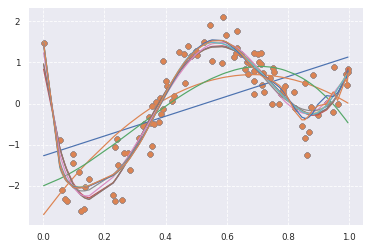

In [10]:
#PolynomialFeatures(degree=1)

deg = [1,2,3,4,5,6,7,8,9,10,50,100]
for d in deg:
    regr = Pipeline([
        ('poly', PolynomialFeatures(degree=d)),
        ('linear', LinearRegression())
    ])
    regr.fit(data, target)
    # make predictions
    p_poly = regr.predict(data)
    # plot regression result
    plt.scatter(data, target, label='data')
    plt.plot(data, p_poly, label='polynomial of degree %d' % (d))

0.0


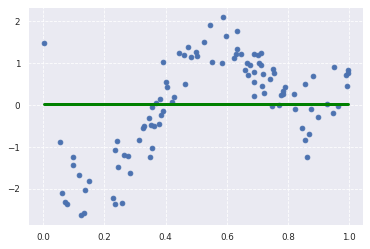

In [11]:
#Lasso

from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Lasso

kx = rbf_kernel(X=data, Y=data, gamma=5)
#KX = rbf_kernel(X, x)

#lasso_clf = LinearRegression()
lasso_clf = Lasso(alpha=10000, max_iter=1000)
lasso_clf.fit(kx, target)

p_lasso = lasso_clf.predict(kx)

plt.scatter(data, target)

#plt.plot(data, p, color='green', marker='o', linestyle='-', linewidth=0.1, markersize=3)
plt.plot(data, p_lasso, color='green', linestyle='-', linewidth=3, markersize=3)

print(lasso_clf.score(kx, target))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


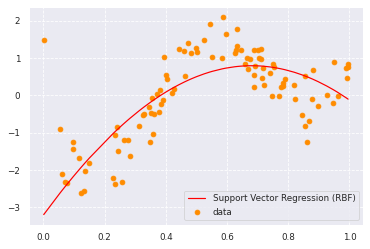

In [12]:
from sklearn import model_selection, preprocessing, linear_model, svm

# SVR-rbf
clf_svr = svm.SVR(kernel='rbf', C=1e3, gamma=0.1, epsilon=0.1)
clf_svr.fit(data, target)
y_rbf = clf_svr.fit(data, target).predict(data)
 
# plot

plt.scatter(data, target, color='darkorange', label='data')
plt.plot(data, y_rbf, color='red', label='Support Vector Regression (RBF)')
plt.legend()
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=0)

以下では，Googleドライブのマイドライブ直下にstudy_ai_mlフォルダを置くことを仮定しています．必要に応じて，パスを変更してください。

In [14]:
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint

cb_cp = ModelCheckpoint('./weights.{epoch:02d}-{val_loss:.2f}.hdf5', verbose=1, save_weights_only=True)
cb_tf  = TensorBoard(log_dir='./tensorBoard', histogram_freq=0)

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_st

In [15]:
def relu_reg_model():
    model = Sequential()
    model.add(Dense(10, input_dim=1, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='linear'))
#     model.add(Dense(100, activation='relu'))
#     model.add(Dense(100, activation='relu'))
#     model.add(Dense(100, activation='relu'))
#     model.add(Dense(100, activation='relu'))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [16]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.wrappers.scikit_learn import KerasRegressor

# use data split and fit to run the model
estimator = KerasRegressor(build_fn=relu_reg_model, epochs=100, batch_size=5, verbose=1)

history = estimator.fit(x_train, y_train, callbacks=[cb_cp, cb_tf], validation_data=(x_test, y_test))



Train on 90 samples, validate on 10 samples

Epoch 1/100
90/90 [==============================] - 1s 8ms/step - loss: 1.3394 - val_loss: 1.2887

Epoch 00001: saving model to ./weights.01-1.29.hdf5
Epoch 2/100
90/90 [==============================] - 0s 2ms/step - loss: 1.3210 - val_loss: 1.2861

Epoch 00002: saving model to ./weights.02-1.29.hdf5
Epoch 3/100
90/90 [==============================] - 0s 2ms/step - loss: 1.3185 - val_loss: 1.2883

Epoch 00003: saving model to ./weights.03-1.29.hdf5
Epoch 4/100
90/90 [==============================] - 0s 2ms/step - loss: 1.3211 - val_loss: 1.2869

Epoch 00004: saving model to ./weights.04-1.29.hdf5
Epoch 5/100
90/90 [==============================] - 0s 2ms/step - loss: 1.3242 - val_loss: 1.2869

Epoch 00005: saving model to ./weights.05-1.29.hdf5
Epoch 6/100
90/90 [==============================] - 0s 2ms/step - loss: 1.3244 - val_loss: 1.2918

Epoch 00006: saving model to ./weights.06-1.29.hdf5
Epoch 7/100
90/90 [======================


Epoch 00050: saving model to ./weights.50-1.29.hdf5
Epoch 51/100
90/90 [==============================] - 0s 2ms/step - loss: 1.3172 - val_loss: 1.2885

Epoch 00051: saving model to ./weights.51-1.29.hdf5
Epoch 52/100
90/90 [==============================] - 0s 2ms/step - loss: 1.3176 - val_loss: 1.2883

Epoch 00052: saving model to ./weights.52-1.29.hdf5
Epoch 53/100
90/90 [==============================] - 0s 2ms/step - loss: 1.3171 - val_loss: 1.2884

Epoch 00053: saving model to ./weights.53-1.29.hdf5
Epoch 54/100
90/90 [==============================] - 0s 2ms/step - loss: 1.3170 - val_loss: 1.2885

Epoch 00054: saving model to ./weights.54-1.29.hdf5
Epoch 55/100
90/90 [==============================] - 0s 2ms/step - loss: 1.3176 - val_loss: 1.2883

Epoch 00055: saving model to ./weights.55-1.29.hdf5
Epoch 56/100
90/90 [==============================] - 0s 2ms/step - loss: 1.3171 - val_loss: 1.2883

Epoch 00056: saving model to ./weights.56-1.29.hdf5
Epoch 57/100
90/90 [=========

In [17]:
y_pred = estimator.predict(x_train)

90/90 [==============================] - 0s 984us/step


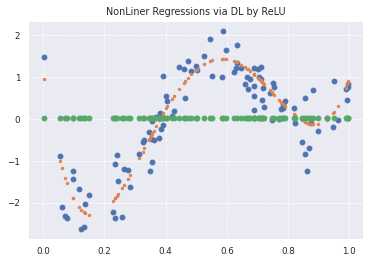

In [18]:
plt.title('NonLiner Regressions via DL by ReLU')
plt.plot(data, target, 'o')
plt.plot(data, true_func(data), '.')
plt.plot(x_train, y_pred, "o", label='predicted: deep learning')
#plt.legend(loc=2)

In [19]:
print(lasso_clf.coef_)

[-0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
